# Sobre que trata el dataset

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

In [1]:
import pandas as pd
from pycaret.nlp import *
from pycaret.utils import enable_colab
import spacy
import nltk
from nltk.corpus import stopwords

In [2]:
spacy.load('en_core_web_sm')

In [3]:
reviews = pd.read_csv('Reviews.csv')

In [4]:
reviews.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [5]:
reviews.shape

(568454, 10)

In [6]:
custom_stopwords = stopwords.words('english') + [
    'br',
    'good', 
    'make', 
    'taste', 
    'use', 
    'try', 
    'eat', 
    'great', 
    'food', 
    'product',
    'kinda', 
    'flavor', 
    'tendency', 
    'owner',
    'station', 
    'oomph',
    'diferente', 
    'increase', 
    'mother', 
    'locally',
    "buy", 
    "suppose", 
    "session", 
    "really", 
    "love", 
    "begin", 
    "pc", 
    "well", 
    "find", 
    "help",
    "go",
    "would",
    "get",
    "even",
    "truth",
    "decrease",
    "lazy",
    "reintroduce",
    "give",
    "planning",
    "ability",
    "ue",
    "favor",
]

In [7]:
reviews = reviews.sample(2500, random_state=786).reset_index(drop=True)
reviews.shape

(2500, 10)

In [8]:
exp_nlp101 = setup(data = reviews, target = 'Text', session_id = 123, custom_stopwords = custom_stopwords)

Description,Value
session_id,123
Documents,2500
Vocab Size,6437
Custom Stopwords,True


In [9]:
text_list = list(reviews['Text'])
type(text_list)

list

In [10]:
#exp_nlp101_list = setup(data = text_list, session_id = 123, custom_stopwords = custom_stopwords)

In [11]:
hdp = create_model('hdp')

In [12]:
print(hdp)

In [13]:
hdp2 = create_model('hdp', num_topics = 8, multi_core = True)

In [14]:
print(hdp2)

In [15]:
hdp_results = assign_model(hdp)
hdp_results.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic
0,530605,B002FWTEYY,A2TB966VCVI38V,Suprmodl,0,0,5,1349481600,Great for lunches,lunch chocolatly sweet packaging mail keep cold,0.036776,0.902186,0.033788,0.027250,Topic 1
1,180902,B007Y59HVM,A31NTYWMRQA0QZ,JolietBear,15,15,5,1339113600,Wow...fantastic coffee at a great price,reasonably_price ship fast worry free fact com...,0.509051,0.480051,0.000000,0.000000,Topic 0
2,9528,B003ZRZN7K,A2GEZJHBV92EVR,History buff,0,0,5,1345852800,I am an adult & I STILL love this.,always drink favorite mix sprite day mind larg...,0.548144,0.411318,0.022271,0.018267,Topic 0
3,178161,B002FX2IOQ,A1I5P1UCW9969Y,"Jihyun Park ""jihyun park""",0,0,2,1313971200,my kids don't like it,hear compliment organic valley milk carton kid...,0.013550,0.584368,0.391999,0.010083,Topic 1
4,71038,B001VNL00O,A18Q1Z01K679WR,Alan Truly,1,1,5,1337990400,HOT HOT HOT!!!,add smoky heat fact keep little shake jar righ...,0.110360,0.540653,0.344188,0.000000,Topic 1


In [16]:
hdp2_results = assign_model(hdp2)
hdp2_results.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Dominant_Topic
0,530605,B002FWTEYY,A2TB966VCVI38V,Suprmodl,0,0,5,1349481600,Great for lunches,lunch chocolatly sweet packaging mail keep cold,0.018548,0.405975,0.017573,0.501466,0.016515,0.014717,0.01304,0.012165,Topic 3
1,180902,B007Y59HVM,A31NTYWMRQA0QZ,JolietBear,15,15,5,1339113600,Wow...fantastic coffee at a great price,reasonably_price ship fast worry free fact com...,0.319672,0.000000,0.000000,0.000000,0.664287,0.000000,0.00000,0.000000,Topic 4
2,9528,B003ZRZN7K,A2GEZJHBV92EVR,History buff,0,0,5,1345852800,I am an adult & I STILL love this.,always drink favorite mix sprite day mind larg...,0.584535,0.000000,0.011710,0.356193,0.011017,0.000000,0.00000,0.000000,Topic 0
3,178161,B002FX2IOQ,A1I5P1UCW9969Y,"Jihyun Park ""jihyun park""",0,0,2,1313971200,my kids don't like it,hear compliment organic valley milk carton kid...,0.000000,0.000000,0.493122,0.000000,0.473691,0.000000,0.00000,0.000000,Topic 2
4,71038,B001VNL00O,A18Q1Z01K679WR,Alan Truly,1,1,5,1337990400,HOT HOT HOT!!!,add smoky heat fact keep little shake jar righ...,0.232299,0.203362,0.338275,0.000000,0.000000,0.215702,0.00000,0.000000,Topic 2


In [17]:
plot_model()

In [18]:
plot_model(plot = 'bigram')

In [19]:
plot_model(hdp2, plot = 'frequency', topic_num = 'Topic 2')

In [20]:
plot_model(hdp, plot = 'frequency', topic_num = 'Topic 3')

In [21]:
plot_model(hdp2, plot = 'topic_distribution')

In [22]:
plot_model(hdp, plot = 'topic_distribution')

In [28]:
plot_model(hdp, plot = 'tsne')

In [29]:
plot_model(hdp2, plot = 'tsne')

2022-12-08 12:44:57.816010: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 12:44:58.600561: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 12:44:58.600588: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-08 12:45:01.271445: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

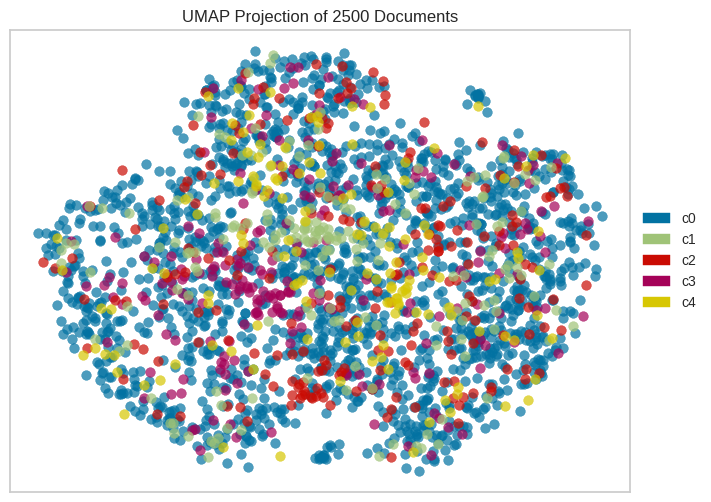

In [30]:
plot_model(hdp2, plot = 'umap')

In [26]:
evaluate_model(hdp)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [27]:
evaluate_model(hdp2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

## HDP

### 4 Topicos
Dos topico de cafe y te

### Mas topicos
Con mas topicos ya nos agrupaba en los distitos topicos de forma repetida el cafe y el te. Tambien al subir los topicos aparecian topicos que no le encontrabamos sentido.